# Terrier

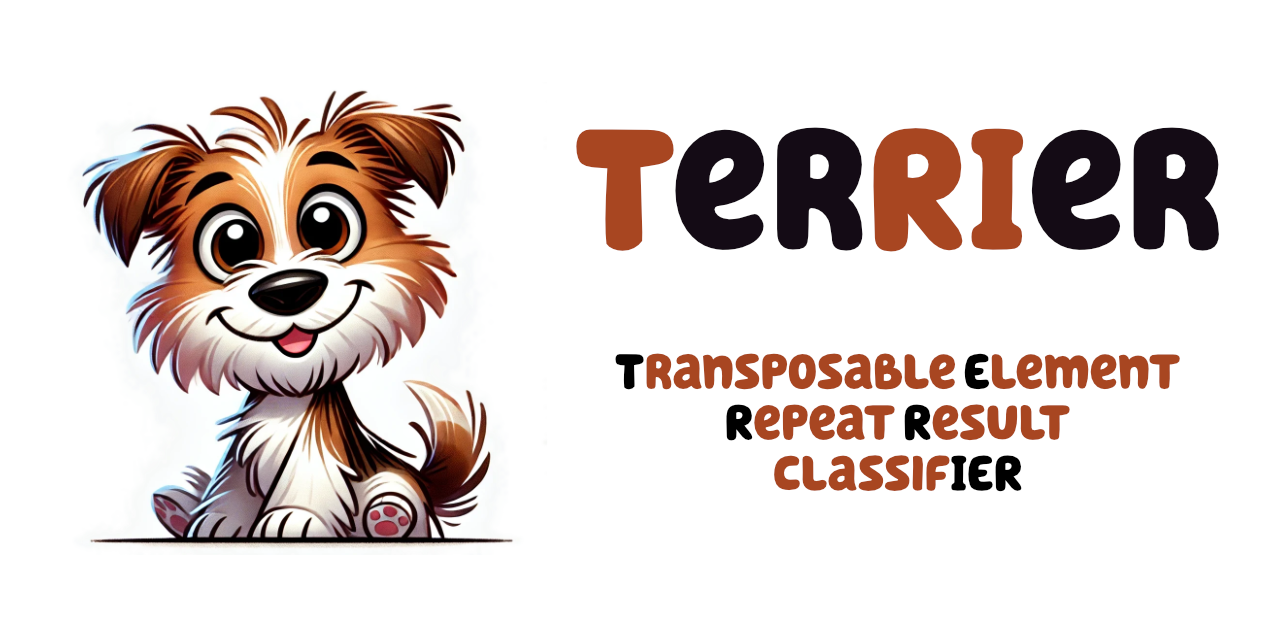

Transposable Element Repeat Result classifIER

[Terrier](https://github.com/rbturnbull/terrier)
 is a Neural Network model to classify transposable element sequences.


* Before you start, please make sure you change the runtime to a GPU.
* To do this, go to the top toolbar, then to Runtime -> Change runtime type -> Hardware accelerator


In [ ]:
#@title Install Terrier
!pip install git+https://github.com/rbturnbull/terrier.git
try:
    import pandas as pd
    import numpy as np
    assert pd.__version__.startswith("2.2.0"), f"Wrong pandas version: {pd.__version__}"
    assert np.__version__.startswith("1.26."), f"Wrong numpy version: {np.__version__}"
except Exception as e:
    print(f"Environment problem: {e}")
    print("Restarting runtime to fix version mismatch...")
    import os
    os.kill(os.getpid(), 9)

  Cloning https://github.com/rbturnbull/terrier.git to /tmp/pip-req-build-o3yad9of
  Running command git clone --filter=blob:none --quiet https://github.com/rbturnbull/terrier.git /tmp/pip-req-build-o3yad9of
  Resolved https://github.com/rbturnbull/terrier.git to commit be21472e3f3573e4ee849654f80a653b3503b27b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/rbturnbull/corgi.git (to revision lightning) to /tmp/pip-install-_tl747ga/bio-corgi_5f35e61f63904efda78a107d75303966
  Running command git clone --filter=blob:none --quiet https://github.com/rbturnbull/corgi.git /tmp/pip-install-_tl747ga/bio-corgi_5f35e61f63904efda78a107d75303966
  Running command git checkout -b lightning --track origin/lightning
  Switched to a new branch 'lightning'
  Branch 'lightning' set up to track remote branch 'lightning' from 'origin'.
  Resolved https://github.com/rbturnbull/corgi.git to com

In [9]:
#@title Terrier Live

import shutil
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display, HTML
from google.colab import files

from terrier import Terrier

terrier = Terrier()

# Create a styled upload button
upload_widget = widgets.FileUpload(
    accept='.fasta,.fa,.fna',  # Accept only FASTA files
    multiple=False
)

# Create a checkboxes
image_dir_checkbox = widgets.Checkbox(
    value=False,
    description="Output images",
    disabled=False,
)

csv_checkbox = widgets.Checkbox(
    value=True,
    description="Output CSV",
    disabled=False,
)

fasta_checkbox = widgets.Checkbox(
    value=True,
    description="Output FASTA",
    disabled=False,
)

# Output widget for displaying results
output = widgets.Output()

# Function to handle file upload
def handle_upload(change):
    output.clear_output()  # Clear previous output
    with output:
        for filename, file_info in upload_widget.value.items():
            content = file_info['content']  # Get file content

            # Save the file locally
            with open(filename, 'wb') as f:
                f.write(content)

            # Display file details
            file_size_kb = len(content) / 1024
            print(f"✅ **Uploaded:** {filename}")
            print(f"📂 **Size:** {file_size_kb:.2f} KB")
            print(f"Running Terrier. The first time will take a while because it will download the weights.")

            # Run Terrier
            path = Path(filename)
            output_dir = Path(path.stem)
            output_csv = output_dir/f"{path.stem}.terrier.csv" if csv_checkbox.value else None
            output_fasta = output_dir/f"{path.stem}.terrier.fa" if fasta_checkbox.value else None

            # Set image_dir conditionally based on checkbox
            image_dir = output_dir/f"{path.stem}-images" if image_dir_checkbox.value else None

            results = terrier(file=filename, output_fasta=output_fasta, output_csv=output_csv, image_dir=image_dir)

            shutil.make_archive(path.stem, 'zip', output_dir)
            files.download(f"{path.stem}.zip")

            print(f"Terrier results saved to {output_dir}")

# Attach event listener
upload_widget.observe(handle_upload, names='value')

# Add help text below the upload button
help_text = """
<div style='font-size:14px; color:#444; margin-top:10px;'>
    <b>📌 Instructions:</b><br>
    - Upload a <b>FASTA file</b> (.fasta, .fa, .fna).<br>
    - The file will be automatically processed using Terrier.<br>
    - If no output appears, ensure your file is in the correct format.<br>
</div>
"""

# Display everything
display(HTML(help_text), fasta_checkbox, csv_checkbox, image_dir_checkbox, upload_widget, output)


Checkbox(value=True, description='Output FASTA')

Checkbox(value=True, description='Output CSV')

Checkbox(value=False, description='Output images')

FileUpload(value={}, accept='.fasta,.fa,.fna', description='Upload')

Output()